In [146]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import statistics
import math
import csv


In [147]:
# # Task 1: Association Analysis
# Select a table (Primary) to perform the Association Analysis
WS = pd.read_csv("Primary.csv")
WS = WS.rename(columns={'Residence':'Rural', 
                        'Unnamed: 7':'Urban',
                        'Wealth quintile':'Poorest', 
                        'Unnamed: 9': "Richest",
                        'Unnamed: 11':'Times period'})
WS = WS.dropna(subset=["Region", "Rural", "Urban", "Poorest", "Richest"]) # removing the columns that has an NAN
WS = WS.drop(WS[(WS['Times period'] > "2022")].index) # removing any unrealiable datas that has year > 2022
WS.reset_index(drop=True, inplace=True)
WS = WS.head(50) # getting the first 50 values

In [148]:
# Remove the % sign
WS['Total'] = list(map(lambda x: x[:-1], WS['Total'].values))
WS['Rural'] = list(map(lambda x: x[:-1], WS['Rural'].values))
WS['Urban'] = list(map(lambda x: x[:-1], WS['Urban'].values))
WS['Poorest'] = list(map(lambda x: x[:-1], WS['Poorest'].values))
WS['Richest'] = list(map(lambda x: x[:-1], WS['Richest'].values))

In [149]:
# Change the data to integers instead of strings
WS['Total'] = [int(x) for x in WS['Total'].values]
WS['Rural'] = [int(x) for x in WS['Rural'].values]
WS['Urban'] = [int(x) for x in WS['Urban'].values]
WS['Poorest'] = [int(x) for x in WS['Poorest'].values]
WS['Richest'] = [int(x) for x in WS['Total'].values]
# print(WS)


In [150]:
# Change continuous value "Times period" to discrete. 
# To do this we thake the first 4 values of the year, so instead of 2015-16
# We have 2015.
WS['Times period'] = list(map(lambda x: x[:4], WS['Times period'].values)) # only take the first 4 values of the value
WS['Times period'] = [int(x) for x in WS['Times period'].values]
WS_copy = WS.copy(deep=True)

In [151]:
# We do not need to discretizate ISO3 and Countries and Areas since they are all unique.
# Drop Source since it brings no does not bring any significants to the data for the 
# percentage of students with internet in an region
# We also Drop 'Sub-region' since there is already 'Region'
WS_copy = WS_copy.drop(columns=['ISO3','Countries and areas', 'Source'])
WS_copy.to_csv('./216396764-216426744-T1Old.csv') # Save data to csv
WS_copy.head()
# Use TransactionEncoder() to 

,Region,Sub-region,Income Group,Total,Rural,Urban,Poorest,Richest,Times period
0,SSA,ESA,Lower middle income (LM),15,2,22,0,15,2015
1,ECA,EECA,Upper middle income (UM),81,69,89,46,81,2015
2,SA,SA,Lower middle income (LM),34,30,49,7,34,2019
3,LAC,LAC,High income (H),63,54,68,9,63,2012
4,SSA,WCA,Low income (L),3,1,6,0,3,2017


In [152]:
from mlxtend.preprocessing import TransactionEncoder


In [153]:
pd.cut(WS['Total'],3)

0     (-0.095, 31.667]
1       (63.333, 95.0]
2     (31.667, 63.333]
3     (31.667, 63.333]
4     (-0.095, 31.667]
5     (31.667, 63.333]
6       (63.333, 95.0]
7       (63.333, 95.0]
8     (-0.095, 31.667]
9     (-0.095, 31.667]
10    (-0.095, 31.667]
11    (-0.095, 31.667]
12      (63.333, 95.0]
13    (31.667, 63.333]
14      (63.333, 95.0]
15    (-0.095, 31.667]
16    (-0.095, 31.667]
17    (-0.095, 31.667]
18    (-0.095, 31.667]
19    (-0.095, 31.667]
20      (63.333, 95.0]
21      (63.333, 95.0]
22    (-0.095, 31.667]
23    (-0.095, 31.667]
24    (-0.095, 31.667]
25    (-0.095, 31.667]
26    (-0.095, 31.667]
27    (-0.095, 31.667]
28    (31.667, 63.333]
29      (63.333, 95.0]
30    (31.667, 63.333]
31    (31.667, 63.333]
32      (63.333, 95.0]
33    (-0.095, 31.667]
34    (-0.095, 31.667]
35    (-0.095, 31.667]
36      (63.333, 95.0]
37    (-0.095, 31.667]
38    (-0.095, 31.667]
39    (31.667, 63.333]
40      (63.333, 95.0]
41    (-0.095, 31.667]
42    (-0.095, 31.667]
43    (-0.0

In [154]:
pd.cut(WS['Rural'],3)

0     (-0.094, 31.333]
1       (62.667, 94.0]
2     (-0.094, 31.333]
3     (31.333, 62.667]
4     (-0.094, 31.333]
5     (31.333, 62.667]
6     (31.333, 62.667]
7       (62.667, 94.0]
8     (-0.094, 31.333]
9     (-0.094, 31.333]
10    (-0.094, 31.333]
11    (-0.094, 31.333]
12      (62.667, 94.0]
13    (-0.094, 31.333]
14    (31.333, 62.667]
15    (-0.094, 31.333]
16    (-0.094, 31.333]
17    (-0.094, 31.333]
18    (-0.094, 31.333]
19    (-0.094, 31.333]
20    (31.333, 62.667]
21      (62.667, 94.0]
22    (-0.094, 31.333]
23    (-0.094, 31.333]
24    (-0.094, 31.333]
25    (-0.094, 31.333]
26    (-0.094, 31.333]
27    (-0.094, 31.333]
28    (31.333, 62.667]
29      (62.667, 94.0]
30    (31.333, 62.667]
31    (31.333, 62.667]
32      (62.667, 94.0]
33    (-0.094, 31.333]
34    (-0.094, 31.333]
35    (-0.094, 31.333]
36      (62.667, 94.0]
37    (-0.094, 31.333]
38    (-0.094, 31.333]
39    (-0.094, 31.333]
40      (62.667, 94.0]
41    (-0.094, 31.333]
42    (-0.094, 31.333]
43    (-0.0

In [155]:
pd.cut(WS['Urban'],3)

0      (0.905, 32.667]
1       (64.333, 96.0]
2     (32.667, 64.333]
3       (64.333, 96.0]
4      (0.905, 32.667]
5       (64.333, 96.0]
6       (64.333, 96.0]
7       (64.333, 96.0]
8      (0.905, 32.667]
9      (0.905, 32.667]
10     (0.905, 32.667]
11     (0.905, 32.667]
12      (64.333, 96.0]
13    (32.667, 64.333]
14      (64.333, 96.0]
15     (0.905, 32.667]
16     (0.905, 32.667]
17     (0.905, 32.667]
18     (0.905, 32.667]
19     (0.905, 32.667]
20      (64.333, 96.0]
21      (64.333, 96.0]
22     (0.905, 32.667]
23     (0.905, 32.667]
24     (0.905, 32.667]
25    (32.667, 64.333]
26     (0.905, 32.667]
27     (0.905, 32.667]
28    (32.667, 64.333]
29      (64.333, 96.0]
30    (32.667, 64.333]
31      (64.333, 96.0]
32      (64.333, 96.0]
33     (0.905, 32.667]
34    (32.667, 64.333]
35     (0.905, 32.667]
36      (64.333, 96.0]
37     (0.905, 32.667]
38     (0.905, 32.667]
39    (32.667, 64.333]
40      (64.333, 96.0]
41     (0.905, 32.667]
42     (0.905, 32.667]
43    (32.6

In [156]:
pd.cut(WS['Poorest'],3)

0     (-0.086, 28.667]
1     (28.667, 57.333]
2     (-0.086, 28.667]
3     (-0.086, 28.667]
4     (-0.086, 28.667]
5     (-0.086, 28.667]
6       (57.333, 86.0]
7     (-0.086, 28.667]
8     (-0.086, 28.667]
9     (-0.086, 28.667]
10    (-0.086, 28.667]
11    (-0.086, 28.667]
12      (57.333, 86.0]
13    (-0.086, 28.667]
14    (28.667, 57.333]
15    (-0.086, 28.667]
16    (-0.086, 28.667]
17    (-0.086, 28.667]
18    (-0.086, 28.667]
19    (-0.086, 28.667]
20    (-0.086, 28.667]
21    (28.667, 57.333]
22    (-0.086, 28.667]
23    (-0.086, 28.667]
24    (-0.086, 28.667]
25    (-0.086, 28.667]
26    (-0.086, 28.667]
27    (-0.086, 28.667]
28    (-0.086, 28.667]
29      (57.333, 86.0]
30    (-0.086, 28.667]
31    (-0.086, 28.667]
32    (28.667, 57.333]
33    (-0.086, 28.667]
34    (-0.086, 28.667]
35    (-0.086, 28.667]
36    (28.667, 57.333]
37    (-0.086, 28.667]
38    (-0.086, 28.667]
39    (-0.086, 28.667]
40    (28.667, 57.333]
41    (-0.086, 28.667]
42    (-0.086, 28.667]
43    (-0.0

In [157]:
pd.qcut(WS['Times period'], 3)

0     (2009.999, 2015.0]
1     (2009.999, 2015.0]
2       (2018.0, 2019.0]
3     (2009.999, 2015.0]
4       (2015.0, 2018.0]
5     (2009.999, 2015.0]
6       (2015.0, 2018.0]
7     (2009.999, 2015.0]
8     (2009.999, 2015.0]
9     (2009.999, 2015.0]
10      (2015.0, 2018.0]
11      (2018.0, 2019.0]
12      (2015.0, 2018.0]
13    (2009.999, 2015.0]
14      (2015.0, 2018.0]
15      (2015.0, 2018.0]
16      (2018.0, 2019.0]
17      (2015.0, 2018.0]
18    (2009.999, 2015.0]
19    (2009.999, 2015.0]
20      (2015.0, 2018.0]
21      (2015.0, 2018.0]
22      (2015.0, 2018.0]
23    (2009.999, 2015.0]
24      (2015.0, 2018.0]
25      (2015.0, 2018.0]
26    (2009.999, 2015.0]
27      (2018.0, 2019.0]
28      (2015.0, 2018.0]
29      (2015.0, 2018.0]
30      (2015.0, 2018.0]
31      (2015.0, 2018.0]
32      (2015.0, 2018.0]
33      (2015.0, 2018.0]
34      (2015.0, 2018.0]
35      (2015.0, 2018.0]
36      (2015.0, 2018.0]
37    (2009.999, 2015.0]
38    (2009.999, 2015.0]
39      (2015.0, 2018.0]


In [158]:
WS_copy['Total'] = pd.cut(WS['Total'],3,labels=["Total(%): (-0.095, 31.667]", "Total(%): (31.667, 63.333]", "Total(%): (63.333, 95.0]"])
WS_copy['Rural'] = pd.cut(WS['Rural'],3,labels=["Rural(%): (-0.094, 31.333]", "Rural(%): (31.333, 62.667]", "Rural(%): (62.667, 94.0]"])
WS_copy['Urban'] = pd.cut(WS['Urban'],3,labels=["Urban(%): (0.905, 32.667]", "Urban(%): (32.667, 64.333]", "Urban(%): (64.333, 96.0]"])
WS_copy['Poorest'] = pd.cut(WS['Poorest'],3,labels=["Poorest(%): (-0.086, 28.667]", "Poorest(%): (28.667, 57.333]", "Poorest(%): (57.333, 86.0]"])
WS_copy['Richest'] = pd.cut(WS['Richest'],3,labels=["Richest(%): (-0.095, 31.667]", "Richest(%): (31.667, 63.333]", "Richest(%):(63.333, 95.0]"])
WS_copy['Times period'] = pd.qcut(WS['Times period'], 3, labels=["Times period: (2010, 2015]", "Times period: (2015, 2018]","Times period: (2018, 2019]"])


In [159]:
# Discretize the table to (50, 28)
region = np.array(WS_copy["Region"])
region = np.reshape(region, (len(WS),1))

subregion = np.array(WS_copy["Sub-region"])
subregion = np.reshape(subregion, (len(WS),1))

total = np.array(WS_copy["Total"])
total = np.reshape(total, (len(WS),1))

income = np.array(WS_copy["Income Group"])
income = np.reshape(income, (len(WS),1))

rural = np.array(WS_copy["Rural"])
rural = np.reshape(rural, (len(WS),1))

urban = np.array(WS_copy["Urban"])
urban = np.reshape(urban, (len(WS),1))

poorest = np.array(WS_copy["Poorest"])
poorest = np.reshape(poorest, (len(WS),1))

richest = np.array(WS_copy["Richest"])
richest = np.reshape(richest, (len(WS),1))

time = np.array(WS_copy["Times period"])
time = np.reshape(time, (len(WS),1))

matrix = pd.DataFrame()


In [160]:
te = TransactionEncoder()
te_ary = te.fit(region).transform(region)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [161]:
te_ary = te.fit(subregion).transform(subregion)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,MENA,SA,WCA
0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1


In [162]:
te_ary = te.fit(income).transform(income)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,MENA,SA,WCA,High income (H),Low income (L),Lower middle income (LM),Upper middle income (UM)
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [163]:
te_ary = te.fit(total).transform(total)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,MENA,SA,WCA,High income (H),Low income (L),Lower middle income (LM),Upper middle income (UM),"Total(%): (-0.095, 31.667]","Total(%): (31.667, 63.333]","Total(%): (63.333, 95.0]"
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [164]:
te_ary = te.fit(rural).transform(rural)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,High income (H),Low income (L),Lower middle income (LM),Upper middle income (UM),"Total(%): (-0.095, 31.667]","Total(%): (31.667, 63.333]","Total(%): (63.333, 95.0]","Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [165]:
te_ary = te.fit(urban).transform(urban)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,Upper middle income (UM),"Total(%): (-0.095, 31.667]","Total(%): (31.667, 63.333]","Total(%): (63.333, 95.0]","Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]","Urban(%): (0.905, 32.667]","Urban(%): (32.667, 64.333]","Urban(%): (64.333, 96.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [166]:
te_ary = te.fit(poorest).transform(poorest)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Total(%): (63.333, 95.0]","Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]","Urban(%): (0.905, 32.667]","Urban(%): (32.667, 64.333]","Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [167]:
te_ary = te.fit(richest).transform(richest)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Rural(%): (62.667, 94.0]","Urban(%): (0.905, 32.667]","Urban(%): (32.667, 64.333]","Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]","Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [168]:
te_ary = te.fit(time).transform(time)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]","Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]","Times period: (2010, 2015]","Times period: (2015, 2018]","Times period: (2018, 2019]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [169]:
matrix.to_csv('./216396764-216426744-T1Disc.csv') # Save data to csv
matrix.head()


,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]","Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]","Times period: (2010, 2015]","Times period: (2015, 2018]","Times period: (2018, 2019]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [170]:
# Find the 10 most frequent item sets. 
# The length/size of these item sets must be at least 2.
# Use the apriori library from https://github.com/ymoch/apyori/blob/master/apyori.py
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


In [171]:
# use apriori to find the support for each item set
frequent_itemsets = apriori(matrix, min_support=0.55,use_colnames=True)
frequent_itemsets

/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.56,"(Total(%): (-0.095, 31.667])"
1,0.62,"(Rural(%): (-0.094, 31.333])"
2,0.78,"(Poorest(%): (-0.086, 28.667])"
3,0.56,"(Richest(%): (-0.095, 31.667])"
4,0.56,"(Total(%): (-0.095, 31.667], Rural(%): (-0.094..."
5,0.56,"(Total(%): (-0.095, 31.667], Poorest(%): (-0.0..."
6,0.56,"(Total(%): (-0.095, 31.667], Richest(%): (-0.0..."
7,0.62,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0..."
8,0.56,"(Rural(%): (-0.094, 31.333], Richest(%): (-0.0..."
9,0.56,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0..."


In [172]:
# Determine the rules and the confidence of the rules
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence")
rules.to_csv("./rules.csv")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Total(%): (-0.095, 31.667])","(Rural(%): (-0.094, 31.333])",0.56,0.62,0.56,1.000000,1.612903,0.2128,inf
1,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667])",0.62,0.56,0.56,0.903226,1.612903,0.2128,4.546667
2,"(Total(%): (-0.095, 31.667])","(Poorest(%): (-0.086, 28.667])",0.56,0.78,0.56,1.000000,1.282051,0.1232,inf
3,"(Total(%): (-0.095, 31.667])","(Richest(%): (-0.095, 31.667])",0.56,0.56,0.56,1.000000,1.785714,0.2464,inf
4,"(Richest(%): (-0.095, 31.667])","(Total(%): (-0.095, 31.667])",0.56,0.56,0.56,1.000000,1.785714,0.2464,inf


In [173]:
rules = rules[["antecedents","consequents","support","confidence","lift"]]

In [174]:
frequent = rules.sort_values(by=["support"]).tail(10)
frequent.to_csv('./frequent.csv')

In [175]:
rules.sort_values(by=["confidence"])

,antecedents,consequents,support,confidence,lift
11,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...","(Total(%): (-0.095, 31.667])",0.56,0.903226,1.612903
1,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667])",0.56,0.903226,1.612903
41,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667], Poorest(%): (-0.0...",0.56,0.903226,1.612903
37,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...","(Total(%): (-0.095, 31.667], Richest(%): (-0.0...",0.56,0.903226,1.612903
6,"(Rural(%): (-0.094, 31.333])","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
18,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667], Richest(%): (-0.0...",0.56,0.903226,1.612903
28,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667], Richest(%): (-0...",0.56,0.903226,1.612903
25,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
13,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667], Poorest(%): (-0.0...",0.56,0.903226,1.612903
26,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0...","(Rural(%): (-0.094, 31.333])",0.56,1.000000,1.612903


In [176]:
least = rules.drop(rules[(rules['confidence'] >= 1)].index)
least = least.head(5)
least.reset_index(drop=True, inplace=True)
least.to_csv('./least_confidence.csv')
least

,antecedents,consequents,support,confidence,lift
0,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667])",0.56,0.903226,1.612903
1,"(Rural(%): (-0.094, 31.333])","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
2,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...","(Total(%): (-0.095, 31.667])",0.56,0.903226,1.612903
3,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667], Poorest(%): (-0.0...",0.56,0.903226,1.612903
4,"(Rural(%): (-0.094, 31.333])","(Total(%): (-0.095, 31.667], Richest(%): (-0.0...",0.56,0.903226,1.612903


In [177]:
most = rules.drop(rules[(rules['confidence'] < 1)].index)
most = most.head(5)
most.reset_index(drop=True, inplace=True)
most.to_csv('./most_confidence.csv')
most

,antecedents,consequents,support,confidence,lift
0,"(Total(%): (-0.095, 31.667])","(Rural(%): (-0.094, 31.333])",0.56,1.0,1.612903
1,"(Total(%): (-0.095, 31.667])","(Poorest(%): (-0.086, 28.667])",0.56,1.0,1.282051
2,"(Total(%): (-0.095, 31.667])","(Richest(%): (-0.095, 31.667])",0.56,1.0,1.785714
3,"(Richest(%): (-0.095, 31.667])","(Total(%): (-0.095, 31.667])",0.56,1.0,1.785714
4,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667])",0.62,1.0,1.282051


In [178]:
# contingency table [2,2]
# __|___A___|___~A__|___+__|
# B_|f_{1,1}|f_{1,0}|f_{1,+}
# ~B|f_{0,1}|f_{0,0}|f_{0,+}
#   |f_{+,1}|f_{+,0}| N

def odd_ratio(table):
    # odd-ratio = (f_{11}f_{00}/f_{01}f_{10})
    return (table[0][0]*table[1][1])/(table[0][1]*table[1][0])
def cosine(table):
    # cosine = (f_{1,1})/sqrt(f_{1,+}f_{+,1})
    return (table[0][0])/(math.sqrt(table[0][2]*table[2][0]))
def interest(table):
    # interest = (N*f_{1,1})/(f_{1,+}f_{+,1})
    return (len(table) * table[0][0])/(table[0][2]*table[2][0])
def Jaccard(table):
    # jaccard = (f_{1,1})/(f_{1,+}+f_{+,1}-f_{1,1})
    return (table[0][0])/(table[0][2]+table[2][0]-table[0][0])


In [179]:
# using the most table we see that the rules are:
# (Total(%): (-0.095, 31.667]) -> (Rural(%): (-0.094, 31.333])
data_crosstab = pd.crosstab(WS_copy['Total'],
                            WS_copy['Rural'], 
                               margins = True)
# column modification
data_crosstab["~Rural(%): (-0.094, 31.333]"] = data_crosstab["Rural(%): (31.333, 62.667]"] + data_crosstab["Rural(%): (62.667, 94.0]"]
data_crosstab = data_crosstab[["Rural(%): (-0.094, 31.333]", "~Rural(%): (-0.094, 31.333]", "All"]]

# row modification
data_crosstab.loc['Total(%): (31.667, 63.333]'] += data_crosstab.loc['Total(%): (63.333, 95.0]']
data_crosstab.drop(['Total(%): (63.333, 95.0]'], inplace=True)

data_crosstab = np.array(data_crosstab)
data_crosstab

array([[28,  0, 28],
       [ 3, 19, 22],
       [31, 19, 50]])

In [180]:
print(most.loc[0,"lift"])
print(odd_ratio(data_crosstab))
print(cosine(data_crosstab))
print(interest(data_crosstab))
print(Jaccard(data_crosstab))

1.6129032258064517
inf
0.9503819266229829
0.0967741935483871
0.9032258064516129


/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_2953/4164596329.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  return (table[0][0]*table[1][1])/(table[0][1]*table[1][0])


In [181]:
# using the most table we see that the rules are:
# (Total(%): (-0.095, 31.667]) -> (Poorest(%): (-0.086, 28.667])
data_crosstab = pd.crosstab(WS_copy['Total'],
                            WS_copy['Poorest'], 
                               margins = True)
# column modification
data_crosstab["~Poorest(%): (-0.086, 28.667]"] = data_crosstab["Poorest(%): (28.667, 57.333]"] + data_crosstab["Poorest(%): (57.333, 86.0]"]
data_crosstab = data_crosstab[["Poorest(%): (-0.086, 28.667]", "~Poorest(%): (-0.086, 28.667]", "All"]]

# row modification
data_crosstab.loc['Total(%): (31.667, 63.333]'] += data_crosstab.loc['Total(%): (63.333, 95.0]']
data_crosstab.drop(['Total(%): (63.333, 95.0]'], inplace=True)

data_crosstab = np.array(data_crosstab)
data_crosstab

array([[28,  0, 28],
       [11, 11, 22],
       [39, 11, 50]])

In [182]:
print(most.loc[1,"lift"])
print(odd_ratio(data_crosstab))
print(cosine(data_crosstab))
print(interest(data_crosstab))
print(Jaccard(data_crosstab))

1.282051282051282
inf
0.8473185457363235
0.07692307692307693
0.717948717948718


/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_2953/4164596329.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  return (table[0][0]*table[1][1])/(table[0][1]*table[1][0])


In [183]:
# using the most table we see that the rules are:
# (Total(%): (-0.095, 31.667]) -> (Richest(%): (-0.095, 31.667])
data_crosstab = pd.crosstab(WS_copy['Total'],
                            WS_copy['Richest'], 
                               margins = True)
# column modification
data_crosstab["~Richest(%): (-0.095, 31.667]"] = data_crosstab["Richest(%): (31.667, 63.333]"] + data_crosstab["Richest(%):(63.333, 95.0]"]
data_crosstab = data_crosstab[["Richest(%): (-0.095, 31.667]", "~Richest(%): (-0.095, 31.667]", "All"]]

# row modification
data_crosstab.loc['Total(%): (31.667, 63.333]'] += data_crosstab.loc['Total(%): (63.333, 95.0]']
data_crosstab.drop(['Total(%): (63.333, 95.0]'], inplace=True)

data_crosstab = np.array(data_crosstab)
data_crosstab


array([[28,  0, 28],
       [ 0, 22, 22],
       [28, 22, 50]])

In [184]:
print(most.loc[2,"lift"])
print(odd_ratio(data_crosstab))
print(cosine(data_crosstab))
print(interest(data_crosstab))
print(Jaccard(data_crosstab))

1.7857142857142856
inf
1.0
0.10714285714285714
1.0


/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_2953/4164596329.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  return (table[0][0]*table[1][1])/(table[0][1]*table[1][0])


In [185]:
# using the most table we see that the rules are:
# (Richest(%): (-0.095, 31.667]) -> (Total(%): (-0.095, 31.667])
data_crosstab = pd.crosstab(WS_copy['Richest'],
                            WS_copy['Total'], 
                               margins = True)
# column modification
data_crosstab["~Total(%): (-0.095, 31.667]"] = data_crosstab["Total(%): (31.667, 63.333]"] + data_crosstab["Total(%): (63.333, 95.0]"]
data_crosstab = data_crosstab[["Total(%): (-0.095, 31.667]", "~Total(%): (-0.095, 31.667]", "All"]]

# row modification
data_crosstab.loc['Richest(%): (31.667, 63.333]'] += data_crosstab.loc['Richest(%):(63.333, 95.0]']
data_crosstab.drop(['Richest(%):(63.333, 95.0]'], inplace=True)

data_crosstab = np.array(data_crosstab)
data_crosstab

array([[28,  0, 28],
       [ 0, 22, 22],
       [28, 22, 50]])

In [186]:
print(most.loc[3,"lift"])
print(odd_ratio(data_crosstab))
print(cosine(data_crosstab))
print(interest(data_crosstab))
print(Jaccard(data_crosstab))

1.7857142857142856
inf
1.0
0.10714285714285714
1.0


/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_2953/4164596329.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  return (table[0][0]*table[1][1])/(table[0][1]*table[1][0])


In [187]:
# using the most table we see that the rules are:
# (Rural(%): (-0.094, 31.333]) -> (Poorest(%): (-0.086, 28.667])
data_crosstab = pd.crosstab(WS_copy['Rural'],
                            WS_copy['Poorest'], 
                               margins = True)
# column modification
data_crosstab["~Poorest(%): (-0.086, 28.667]"] = data_crosstab["Poorest(%): (28.667, 57.333]"] + data_crosstab["Poorest(%): (57.333, 86.0]"]
data_crosstab = data_crosstab[["Poorest(%): (-0.086, 28.667]", "~Poorest(%): (-0.086, 28.667]", "All"]]

# row modification
data_crosstab.loc['Rural(%): (31.333, 62.667]'] += data_crosstab.loc['Rural(%): (62.667, 94.0]']
data_crosstab.drop(['Rural(%): (62.667, 94.0]'], inplace=True)

data_crosstab = np.array(data_crosstab)
data_crosstab

array([[31,  0, 31],
       [ 8, 11, 19],
       [39, 11, 50]])

In [188]:
print(most.loc[4,"lift"])
print(odd_ratio(data_crosstab))
print(cosine(data_crosstab))
print(interest(data_crosstab))
print(Jaccard(data_crosstab))

1.282051282051282
inf
0.8915558282417287
0.07692307692307693
0.7948717948717948


/var/folders/fg/y30p65d530l8lggvsdt476g80000gn/T/ipykernel_2953/4164596329.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  return (table[0][0]*table[1][1])/(table[0][1]*table[1][0])


In [189]:
# Task 2
# Choosing data to perform clustering: Primary.csv
# We remove "ISO3", and "Countries and areas" because they are all unique values
# We remove "Region", "Source", "Sub-region" since they are nominal values and bring significant 
# impact to the cluster

WS2_copy = WS.copy(deep=True)
WS2_copy = WS2_copy.drop(columns=["ISO3", "Countries and areas", "Region", "Sub-region", "Source"])
WS2_copy.to_csv("./216396764-216426744-T2Org.csv") # Before Preprocessing 
WS2_copy.head()


,Income Group,Total,Rural,Urban,Poorest,Richest,Times period
0,Lower middle income (LM),15,2,22,0,15,2015
1,Upper middle income (UM),81,69,89,46,81,2015
2,Lower middle income (LM),34,30,49,7,34,2019
3,High income (H),63,54,68,9,63,2012
4,Low income (L),3,1,6,0,3,2017


In [190]:
from sklearn.preprocessing import OrdinalEncoder

In [191]:
# After Preprocessing
# Note that Income Group is a string value and cannot be processed as a vectored form
# Since Income Group is Ordinal, we are able to allocate a number to the certain data
# Low Income = 0, Lower middle income = 1, Upper middle income = 2, High income = 3.
# First find all the unique values for income group
encoder = OrdinalEncoder(categories=[['Low income (L)','Lower middle income (LM)'
                                        ,'Upper middle income (UM)','High income (H)']])
WS2_copy[["Income Group"]] = encoder.fit_transform(WS2_copy[["Income Group"]])

WS2_copy.head()


,Income Group,Total,Rural,Urban,Poorest,Richest,Times period
0,1.0,15,2,22,0,15,2015
1,2.0,81,69,89,46,81,2015
2,1.0,34,30,49,7,34,2019
3,3.0,63,54,68,9,63,2012
4,0.0,3,1,6,0,3,2017


In [192]:
# We do the same step for "Times period". Since "Times period" is an interval, We can change the 
# data to ordinal. Similar to what we did to task 1, we would label the years to be latest, mid, 
# earliest. Use qcuts.

WS2_copy['Times period'] = pd.qcut(WS2_copy['Times period'], 3, labels=["Old", "Mid","Young"])
encoder = OrdinalEncoder(categories=[['Old', 'Mid', 'Young']])
WS2_copy[["Times period"]] = encoder.fit_transform(WS2_copy[["Times period"]])


In [193]:
# New data
WS2_copy.to_csv("./216396764-216426744-T2Mod.csv") # After Preprocessing 


In [194]:
from sklearn.cluster import KMeans # using the sklearn.cluster and import KMeans


In [195]:
kmeans = KMeans(n_clusters=3).fit(WS2_copy)
id_clusters = kmeans.fit_predict(WS2_copy)
WS2_copy["class"] = id_clusters
WS2_copy.head()

,Income Group,Total,Rural,Urban,Poorest,Richest,Times period,class
0,1.0,15,2,22,0,15,0.0,0
1,2.0,81,69,89,46,81,0.0,1
2,1.0,34,30,49,7,34,2.0,2
3,3.0,63,54,68,9,63,0.0,2
4,0.0,3,1,6,0,3,1.0,0


In [196]:
print(kmeans.inertia_) # Sum of Square error for k = 3

19406.30769230769


In [197]:
kmeans = KMeans(n_clusters=4).fit(WS2_copy)
id_clusters = kmeans.fit_predict(WS2_copy)
WS2_copy["class"] = id_clusters
WS2_copy.head()

,Income Group,Total,Rural,Urban,Poorest,Richest,Times period,class
0,1.0,15,2,22,0,15,0.0,2
1,2.0,81,69,89,46,81,0.0,1
2,1.0,34,30,49,7,34,2.0,0
3,3.0,63,54,68,9,63,0.0,3
4,0.0,3,1,6,0,3,1.0,2


In [198]:
print(kmeans.inertia_) # Sum of Square error for k = 4

13746.250000000002


In [199]:
kmeans = KMeans(n_clusters=5).fit(WS2_copy)
id_clusters = kmeans.fit_predict(WS2_copy)
WS2_copy["class"] = id_clusters
WS2_copy.head()
WS2_copy.to_csv("./216396764-216426744-T2Class.csv")

In [200]:
print(kmeans.inertia_) # Sum of Square error for k = 5


11073.27777777778


In [201]:
# Task 3
# Create the Naive Bayes classifier. We import naive_bayes
# We use the lowest SSE which is k = 5.
# First need to use 3 folds to separate the data from Task 2
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import seaborn as sns
from itertools import cycle
import warnings

In [202]:
# Notice that our confusion matrix is with multiple labels
# So we need to find the overall tp, tn, fp, fn
# to find the overall we take the sum of all 
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

from matplotlib.pyplot import axis
def con_matrix(cm):
    ovall=[]
    for i in cm:
        fp = i.sum(axis=0) - np.diag(i)  
        fn = i.sum(axis=1) - np.diag(i)
        tp = np.diag(i)
        tn = i.sum() - (fp + fn + tp)
        # print(fp,fn,tp,tn)
        ovallfp = fp.sum()
        ovallfn = fn.sum()
        ovalltn = tn.sum()
        ovalltp = tp.sum()
        ovall.append(np.array([[ovalltp,ovallfn],
                        [ovallfp,ovalltn]]))
        ACC = (ovalltp+ovalltn)/(ovalltp+ovallfp+ovallfn+ovalltn)
        PCC = (ovalltp)/(ovalltp + ovallfp)
        REC = (ovalltp)/(ovalltp + ovallfn)
        print("\n---------------------")
        print("Measure of Accuracy")
        print("---------------------")
        print("Accuracy overall Confusion matrix: {:0.05%}".format(ACC))
        print("Precision overall Confusion matrix: {:0.05%}".format(PCC))
        print("Recall overall Confusion matrix: {:0.05%}".format(REC))


In [203]:

# now to graph the ROC Graphs
# To find the ROC Graph, we need to find TP rate (recall) and FN rate 
import matplotlib.pyplot as plt
from sklearn import metrics
# print(np.unique(ytrue[0]))
# print(yprob[1][:,4])
# print(ytrue[0])
# iterate through the 3 folds
def ROC(ytrue, yprob):
    for j in range(len(ytrue)):
        plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w')
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        # getting fpr, tpr, and the auc
        for i in range(len(np.unique(ytrue[j]))):
            fpr[i], tpr[i], _ = metrics.roc_curve(ytrue[j], yprob[j][:,i], pos_label=np.unique(ytrue[j])[i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # plotting the lines
        for i in range(len(np.unique(ytrue[j]))):
            plt.plot(
                fpr[i],
                tpr[i],
                lw = 2,
                label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        plt.plot([0, 1], [0, 1], "k--", lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Some extension of Receiver operating characteristic to multiclass")
        plt.legend(loc="lower right")
        plt.show()

In [204]:
# Naive Bayes for the Training and accuracy check using Testing
# Training AB Testing C
# Training AC Testing B
# Training BC Testing A
X = np.array(WS2_copy.drop(columns=["class"]))
y = np.array(WS2_copy[["class"]])
kf = KFold(n_splits= 3)

In [205]:
# kf.split(X)
from sklearn.metrics import confusion_matrix
cm = []
ytrue = []
ypred = []
yprob = []
for train, test in kf.split(X):
	# Naive Bayes
	X_train, X_test = X[train], X[test]
	y_train, y_test = y[train], y[test]
	gnb = GaussianNB()
	y_predicted = gnb.fit(X_train, y_train.ravel()).predict(X_test)
	probabilities = gnb.predict_proba(np.array(X_test))
	yprob.append(probabilities)
	print("Confusion matrix")
	print(confusion_matrix(y_test,y_predicted),'\n')
	cm.append(confusion_matrix(y_test,y_predicted))
	ytrue.append(y_test)
	ypred.append(y_predicted)


Confusion matrix
[[2 0 0 0 0]
 [0 7 0 0 1]
 [0 0 3 0 0]
 [0 0 2 0 0]
 [0 0 0 0 2]] 

Confusion matrix
[[3 0 0 0 0]
 [0 8 0 0 0]
 [0 0 1 2 0]
 [0 0 0 0 0]
 [1 0 0 0 2]] 

Confusion matrix
[[0 0 0 0 1]
 [0 8 0 0 0]
 [0 0 3 0 0]
 [0 0 1 0 0]
 [0 0 0 0 3]] 



In [206]:
con_matrix(cm) # Naive Bayes


---------------------
Measure of Accuracy
---------------------
Accuracy overall Confusion matrix: 92.94118%
Precision overall Confusion matrix: 82.35294%
Recall overall Confusion matrix: 82.35294%

---------------------
Measure of Accuracy
---------------------
Accuracy overall Confusion matrix: 92.94118%
Precision overall Confusion matrix: 82.35294%
Recall overall Confusion matrix: 82.35294%

---------------------
Measure of Accuracy
---------------------
Accuracy overall Confusion matrix: 95.00000%
Precision overall Confusion matrix: 87.50000%
Recall overall Confusion matrix: 87.50000%


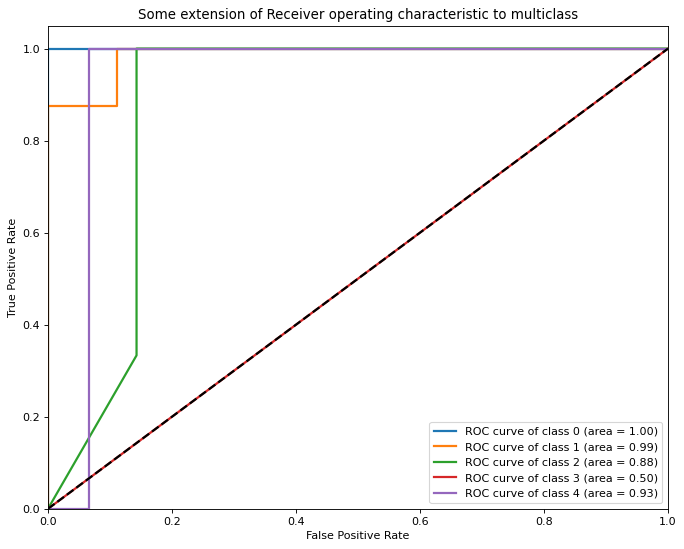

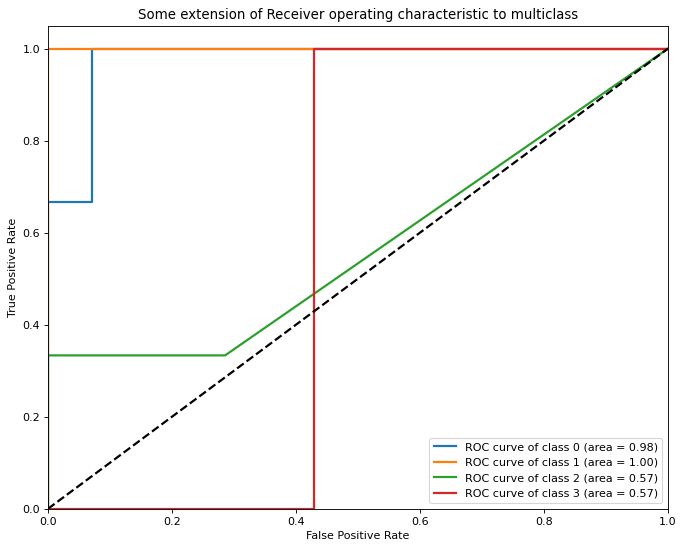

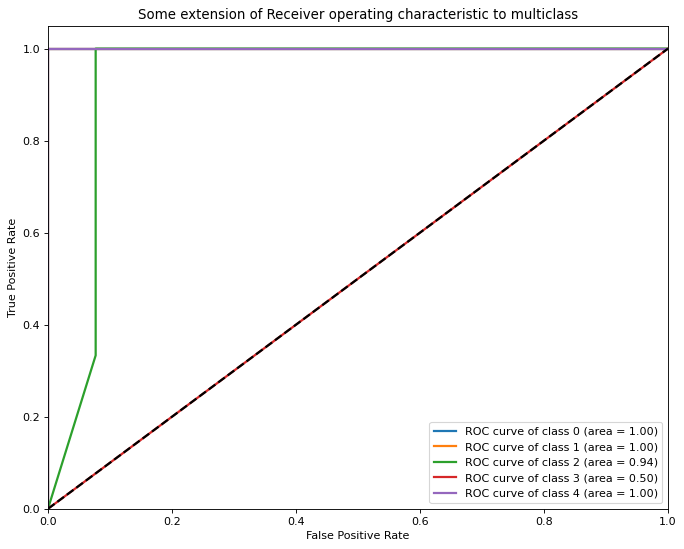

In [207]:
ROC(ytrue,yprob) # Naive Bayes

In [212]:
# Rule base classifier
# Use a bunch of else if statements for the rules
# Use Decision Tree to come up with the rule base
# kf.split(X)
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
cm_r = []
ytrue_r = []
ypred_r = []
yprob_r = []
for train, test in kf.split(X):
    # Useing Decision Tree to classify
	X_train, X_test = X[train], X[test]
	y_train, y_test = y[train], y[test]
	dnb = DecisionTreeClassifier()
	y_predicted = dnb.fit(X_train, y_train.ravel()).predict(X_test)
	probabilities = dnb.predict_proba(np.array(X_test))
	yprob_r.append(probabilities)
	print("Confusion matrix")
	print(confusion_matrix(y_test,y_predicted),'\n')
	cm_r.append(confusion_matrix(y_test,y_predicted))
	ytrue_r.append(y_test)
	ypred_r.append(y_predicted)


Confusion matrix
[[2 0 0 0 0]
 [0 8 0 0 0]
 [1 0 2 0 0]
 [0 0 2 0 0]
 [0 0 0 0 2]] 

Confusion matrix
[[3 0 0 0]
 [0 8 0 0]
 [0 0 3 0]
 [0 1 0 2]] 

Confusion matrix
[[1 0 0 0 0]
 [0 8 0 0 0]
 [1 0 2 0 0]
 [0 0 0 1 0]
 [0 0 0 0 3]] 



In [209]:
con_matrix(cm_r) # Rule Base


---------------------
Measure of Accuracy
---------------------
Accuracy overall Confusion matrix: 95.29412%
Precision overall Confusion matrix: 88.23529%
Recall overall Confusion matrix: 88.23529%

---------------------
Measure of Accuracy
---------------------
Accuracy overall Confusion matrix: 92.94118%
Precision overall Confusion matrix: 82.35294%
Recall overall Confusion matrix: 82.35294%

---------------------
Measure of Accuracy
---------------------
Accuracy overall Confusion matrix: 95.00000%
Precision overall Confusion matrix: 87.50000%
Recall overall Confusion matrix: 87.50000%


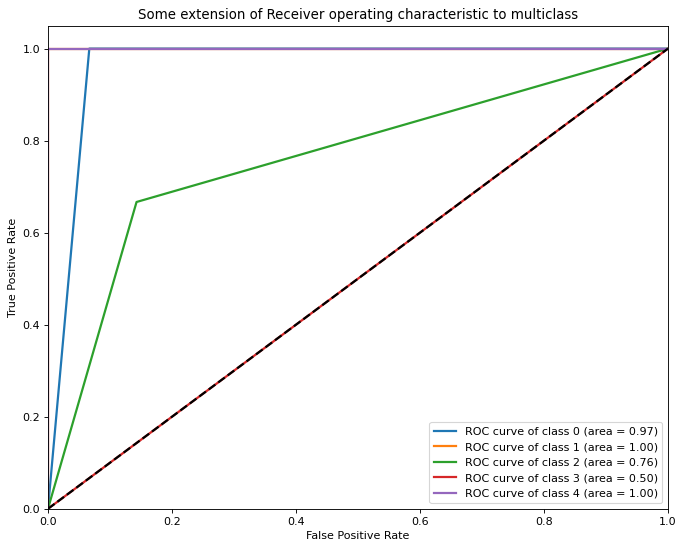

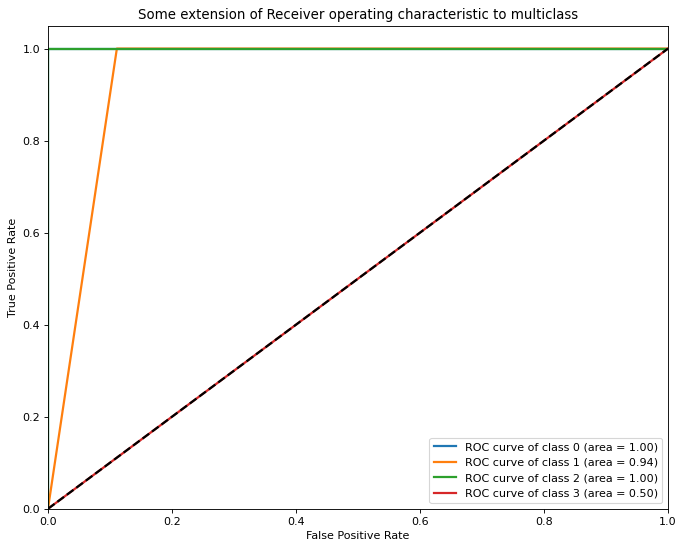

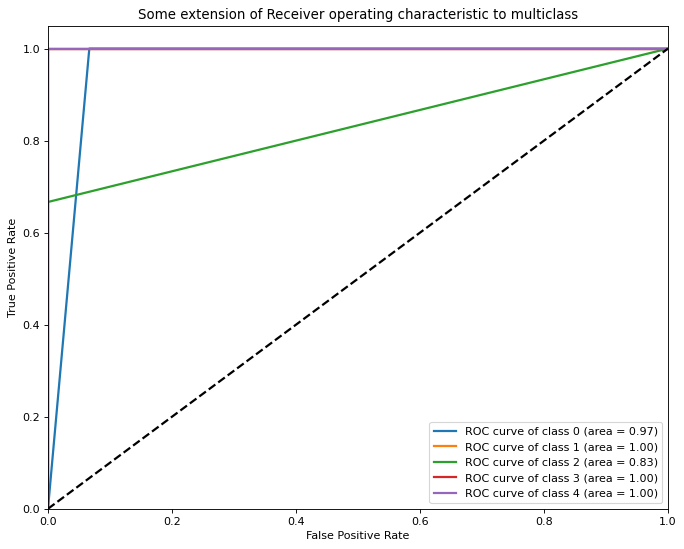

In [213]:
ROC(ytrue_r,yprob_r) # for rule base 